In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Desktop\data\weight-height.csv")

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.shape

(10000, 3)

# DATA VISUALIZATION

In [7]:
import seaborn as sns

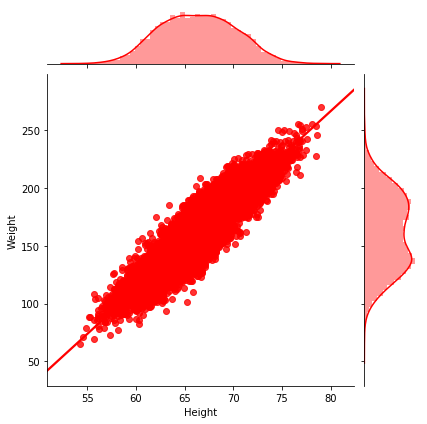

In [21]:
sns.jointplot(x=df["Height"],y=df["Weight"],data=df,kind="reg",color="red")

# splitting data into test and train

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df["Height"],df["Weight"],test_size=0.3,random_state=42)
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

#
print("Train - predictor's shape",x_train.shape)
print("Test - predictor's shape",x_test.shape)
print("Train - Target shape",y_train.shape)
print("Test - Target shape",y_test.shape)


Train - predictor's shape (7000, 1)
Test - predictor's shape (3000, 1)
Train - Target shape (7000, 1)
Test - Target shape (3000, 1)


In [26]:
x_test

array([[68.68723219],
       [68.82933377],
       [66.39812838],
       ...,
       [69.88345085],
       [62.2665918 ],
       [71.52842429]])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [31]:
cls=linear_model.LinearRegression()

In [32]:
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
prediction = cls.predict(x_test)

In [36]:
#parameters used for models
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [37]:
print("cofficient of linearr regression  ",cls.coef_)

cofficient of linearr regression   [[7.69542535]]


In [38]:
print("intercept of linear regression  ",cls.intercept_)

intercept of linear regression   [-349.32334861]


In [41]:
print("'mean square error ",metrics.mean_squared_error(y_test,prediction))

'mean square error  148.3622953279399


In [43]:
print("model r^2 square values ",metrics.r2_score(y_test,prediction))

model r^2 square values  0.8577298529881874


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'linear regression')

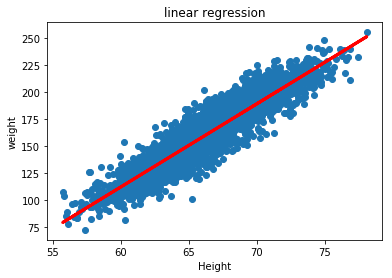

In [47]:
plt.scatter(x_test,y_test)
plt.plot(x_test,prediction,color="red",linewidth=3)
plt.xlabel("Height")
plt.ylabel("weight")
plt.title("linear regression")

residual plot

Text(0, 0.5, 'residue')

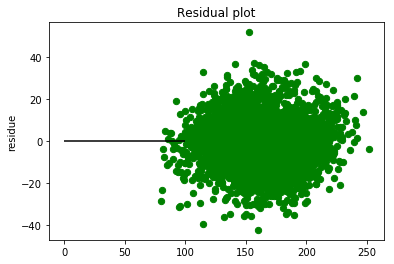

In [48]:
plt.scatter(cls.predict(x_test),cls.predict(x_test)- y_test,c="g",s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title("Residual plot")
plt.ylabel('residue')